In [3]:
# Making packages ready for data preprocessing
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# # Getting and reading the data
# df = pd.read_csv("leaf.csv")
# df

    

In [6]:
def read_initial_data():
   return pd.read_csv("leaf.csv") 

read_initial_data()

,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.844820,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
335,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590
336,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350
337,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260


### Some values are set as columns which is not right. Disabling the column, makes the values move to the right position

In [54]:
# Disabling the column of the dataset
df = pd.read_csv("leaf.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260


### The dependent variable has to be in the last position not the first. Steps are:
- Storing the target variable.
- Dropping output variable
- Inserting output variable to the correct position

In [55]:
# Replacing the target variable to the last position
y_value= df.iloc[ :, 0]  #Storing the output values
df= df.drop([0], axis =1)# dropping the output value at the first index
df

df.insert(15, '0', y_value) #inserting at the last index
df


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0
0,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,1
1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,1
2,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,1
3,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,1
4,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,36
336,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590,36
337,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,36
338,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,36


### Giving the right column names.

In [56]:
# Setting the real column names
df.columns = ["Specimen_Number", "Eccentricity", "Asp_Ratio", "Elongation","Solidity", "Stoc_Convexity", "Isop_Factor", "Max_Ind_Depth", "Lobedness", 
             "Ave_Intensity", "Ave_Contrast", "Smoothness", "Thir_moment", "Uniformity", "Entropy", "Class(Species)"]


df  

,Specimen_Number,Eccentricity,Asp_Ratio,Elongation,Solidity,Stoc_Convexity,Isop_Factor,Max_Ind_Depth,Lobedness,Ave_Intensity,Ave_Contrast,Smoothness,Thir_moment,Uniformity,Entropy,Class(Species)
0,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,1
1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,1
2,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,1
3,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,1
4,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,36
336,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590,36
337,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,36
338,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,36


In [57]:
df.columns # Reading column names

Index(['Specimen_Number', 'Eccentricity', 'Asp_Ratio', 'Elongation',
       'Solidity', 'Stoc_Convexity', 'Isop_Factor', 'Max_Ind_Depth',
       'Lobedness', 'Ave_Intensity', 'Ave_Contrast', 'Smoothness',
       'Thir_moment', 'Uniformity', 'Entropy', 'Class(Species)'],
      dtype='object')

### As variable specimen number does not contribute toward the output variable, it would be good to drop it.

In [58]:
df = df.drop(columns ="Specimen_Number") # Dropping Specimen_number as it is only indicating the leaf ranking, it can not inflence the target variable.
df

,Eccentricity,Asp_Ratio,Elongation,Solidity,Stoc_Convexity,Isop_Factor,Max_Ind_Depth,Lobedness,Ave_Intensity,Ave_Contrast,Smoothness,Thir_moment,Uniformity,Entropy,Class(Species)
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,1
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,1
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,1
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,1
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,36
336,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590,36
337,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,36
338,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,36


### Adding meaning to the output values instead of just integers.

In [59]:
 # Making target variable more meaningful
df['Class(Species)'] = 'SP_' + df['Class(Species)'].astype(str)
df

,Eccentricity,Asp_Ratio,Elongation,Solidity,Stoc_Convexity,Isop_Factor,Max_Ind_Depth,Lobedness,Ave_Intensity,Ave_Contrast,Smoothness,Thir_moment,Uniformity,Entropy,Class(Species)
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560,SP_1
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659,SP_1
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348,SP_1
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785,SP_1
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214,SP_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810,SP_36
336,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590,SP_36
337,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350,SP_36
338,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260,SP_36


### Let us see some quick data information

In [60]:
# Getting a quick information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Eccentricity    340 non-null    float64
 1   Asp_Ratio       340 non-null    float64
 2   Elongation      340 non-null    float64
 3   Solidity        340 non-null    float64
 4   Stoc_Convexity  340 non-null    float64
 5   Isop_Factor     340 non-null    float64
 6   Max_Ind_Depth   340 non-null    float64
 7   Lobedness       340 non-null    float64
 8   Ave_Intensity   340 non-null    float64
 9   Ave_Contrast    340 non-null    float64
 10  Smoothness      340 non-null    float64
 11  Thir_moment     340 non-null    float64
 12  Uniformity      340 non-null    float64
 13  Entropy         340 non-null    float64
 14  Class(Species)  340 non-null    object 
dtypes: float64(14), object(1)
memory usage: 40.0+ KB


### Making sure output values are nomial in nature.

In [61]:
#Making target variable a categorical variable
df["Class(Species)"] = pd.Categorical(df["Class(Species)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Eccentricity    340 non-null    float64 
 1   Asp_Ratio       340 non-null    float64 
 2   Elongation      340 non-null    float64 
 3   Solidity        340 non-null    float64 
 4   Stoc_Convexity  340 non-null    float64 
 5   Isop_Factor     340 non-null    float64 
 6   Max_Ind_Depth   340 non-null    float64 
 7   Lobedness       340 non-null    float64 
 8   Ave_Intensity   340 non-null    float64 
 9   Ave_Contrast    340 non-null    float64 
 10  Smoothness      340 non-null    float64 
 11  Thir_moment     340 non-null    float64 
 12  Uniformity      340 non-null    float64 
 13  Entropy         340 non-null    float64 
 14  Class(Species)  340 non-null    category
dtypes: category(1), float64(14)
memory usage: 38.9 KB


In [62]:
df.shape

(340, 15)

In [63]:
df.describe()

,Eccentricity,Asp_Ratio,Elongation,Solidity,Stoc_Convexity,Isop_Factor,Max_Ind_Depth,Lobedness,Ave_Intensity,Ave_Contrast,Smoothness,Thir_moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719854,2.440210,0.513760,0.904158,0.943793,0.531234,0.037345,0.523845,0.051346,0.124535,0.017670,0.005928,0.000387,1.162630
std,0.208311,2.599043,0.195583,0.114639,0.115047,0.217532,0.038575,1.039639,0.035965,0.051860,0.013755,0.005294,0.000431,0.584854
min,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,0.550623,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,0.895097,2.343100,0.633373,0.976897,1.000000,0.700713,0.047834,0.416432,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.190670,0.280810,0.073089,0.029786,0.002936,2.708500


### Let check of there is not a number data type. This below code will be useful to check outliers as they are replaced with mean values.

In [64]:
# Checking for not a number value
df.isnull().sum()

Eccentricity      0
Asp_Ratio         0
Elongation        0
Solidity          0
Stoc_Convexity    0
Isop_Factor       0
Max_Ind_Depth     0
Lobedness         0
Ave_Intensity     0
Ave_Contrast      0
Smoothness        0
Thir_moment       0
Uniformity        0
Entropy           0
Class(Species)    0
dtype: int64

### Normalising the data

In [65]:
random.seed(14)

X = df.iloc[:, :-1]  #getting the features
y = df.iloc[:,-1]    # getting target variable

X_values = X.values  # getting features values for normalization

# Normalize
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X.values)

# convert the normalized values into the features data
normal_X =  pd.DataFrame(X_norm, columns=X.columns)

# adding diagonis, Age and Gender to make the data ready for use
normal_X.insert(loc= 14, column='Class(Species)', value=y.values)

df = normal_X
df

,Eccentricity,Asp_Ratio,Elongation,Solidity,Stoc_Convexity,Isop_Factor,Max_Ind_Depth,Lobedness,Ave_Intensity,Ave_Contrast,Smoothness,Thir_moment,Uniformity,Entropy,Class(Species)
0,0.691741,0.025933,0.257336,0.983222,1.000000,0.971479,0.009279,0.000345,0.230372,0.382122,0.208308,0.169265,0.091450,0.396282,SP_1
1,0.708517,0.028789,0.301583,0.975688,0.997100,0.923710,0.012266,0.000491,0.103088,0.230647,0.097316,0.083859,0.023190,0.207629,SP_1
2,0.737430,0.031384,0.335863,0.967879,1.000000,0.935828,0.023558,0.001202,0.037033,0.097132,0.030203,0.023388,0.010571,0.107944,SP_1
3,0.704252,0.025128,0.292781,0.964161,1.000000,0.947178,0.020599,0.000991,0.058865,0.129655,0.043841,0.031295,0.020263,0.164802,SP_1
4,0.800710,0.042376,0.400854,0.966758,1.000000,0.867617,0.023409,0.001191,0.015707,0.048198,0.013006,0.011180,0.005661,0.068032,SP_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.292799,0.007492,0.844076,0.392651,0.316863,0.060086,0.453869,0.212962,0.591755,0.708159,0.563924,0.443711,0.277719,0.732031,SP_36
336,0.185520,0.004342,0.767880,0.464270,0.526172,0.075000,0.388285,0.157443,0.733636,0.747327,0.616513,0.398307,0.515036,0.880824,SP_36
337,0.268094,0.001459,0.801518,0.436437,0.363374,0.072653,0.443178,0.203330,0.499015,0.701772,0.555560,0.537734,0.152262,0.600252,SP_36
338,0.547622,0.007548,0.722836,0.345247,0.130818,0.101431,0.563534,0.324500,0.244371,0.414054,0.236277,0.201667,0.087957,0.387224,SP_36


### As data is normalised, let us check for outliers using barplot

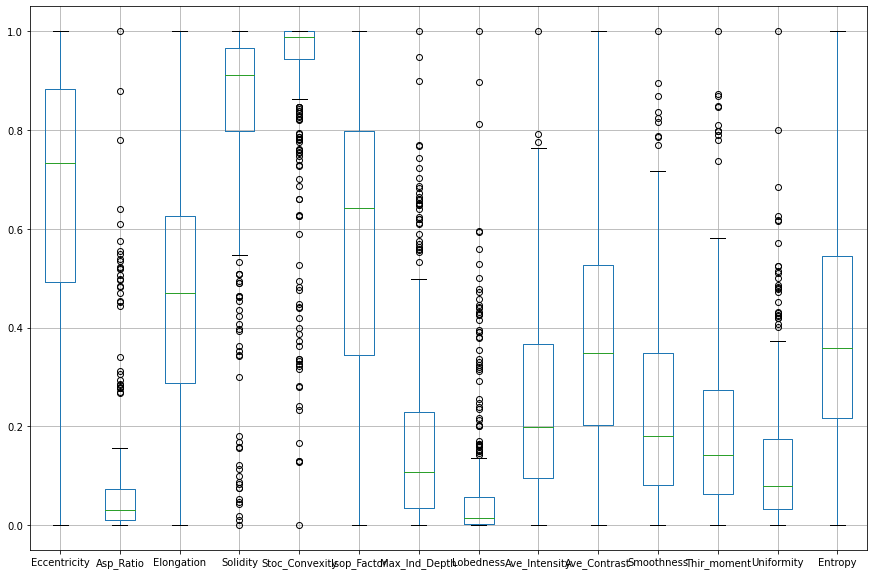

In [66]:
# Checking for outliers

plt.figure(figsize=(15, 10))
df.boxplot()
plt.show()

### Running the below 2 blocks of code 6 times to fully treat outliers with mean values

In [77]:
# replace outliers with nan 
outlier_cols = X

for col in outlier_cols:
    # calculate IQR and set cutoff value for outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    high_cutoff = q3 + 1.5 * iqr
    low_cutoff = q1 - 1.5 * iqr
    # replace outliers with null values
    df.loc[df[col] > high_cutoff, col]= np.nan
    df.loc[df[col] < low_cutoff, col] = np.nan

df.isnull().sum()

Eccentricity      0
Asp_Ratio         0
Elongation        0
Solidity          0
Stoc_Convexity    0
Isop_Factor       0
Max_Ind_Depth     0
Lobedness         0
Ave_Intensity     0
Ave_Contrast      0
Smoothness        0
Thir_moment       0
Uniformity        0
Entropy           0
Class(Species)    0
dtype: int64

In [78]:
# Treating outliers using mean
from sklearn.impute import SimpleImputer

outlier_col = df.iloc[:, [1,3,4,6,7,8,10,11,12]].values
imputer = SimpleImputer(missing_values= np.nan, strategy= "mean")
imputer.fit(outlier_col)
outlier_col =imputer.transform(outlier_col)
df.iloc[:, [1,3,4,6,7,8,10,11,12]] = outlier_col
df

,Eccentricity,Asp_Ratio,Elongation,Solidity,Stoc_Convexity,Isop_Factor,Max_Ind_Depth,Lobedness,Ave_Intensity,Ave_Contrast,Smoothness,Thir_moment,Uniformity,Entropy,Class(Species)
0,0.691741,0.025933,0.257336,0.983222,1.000000,0.971479,0.009279,0.000345,0.230372,0.382122,0.208308,0.169265,0.091450,0.396282,SP_1
1,0.708517,0.028789,0.301583,0.975688,0.997100,0.923710,0.012266,0.000491,0.103088,0.230647,0.097316,0.083859,0.023190,0.207629,SP_1
2,0.737430,0.031384,0.335863,0.967879,1.000000,0.935828,0.023558,0.001202,0.037033,0.097132,0.030203,0.023388,0.010571,0.107944,SP_1
3,0.704252,0.025128,0.292781,0.964161,1.000000,0.947178,0.020599,0.000991,0.058865,0.129655,0.043841,0.031295,0.020263,0.164802,SP_1
4,0.800710,0.042376,0.400854,0.966758,1.000000,0.867617,0.023409,0.001191,0.015707,0.048198,0.013006,0.011180,0.005661,0.068032,SP_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.292799,0.007492,0.844076,0.891961,0.983627,0.060086,0.104485,0.020526,0.591755,0.708159,0.563924,0.443711,0.072500,0.732031,SP_36
336,0.185520,0.004342,0.767880,0.891961,0.983627,0.075000,0.104485,0.020526,0.238134,0.747327,0.616513,0.398307,0.096992,0.880824,SP_36
337,0.268094,0.001459,0.801518,0.891961,0.983627,0.072653,0.104485,0.020526,0.499015,0.701772,0.555560,0.163777,0.152262,0.600252,SP_36
338,0.547622,0.007548,0.722836,0.891961,0.983627,0.101431,0.124751,0.020526,0.244371,0.414054,0.236277,0.201667,0.087957,0.387224,SP_36


### Checking for outlier using boxplot

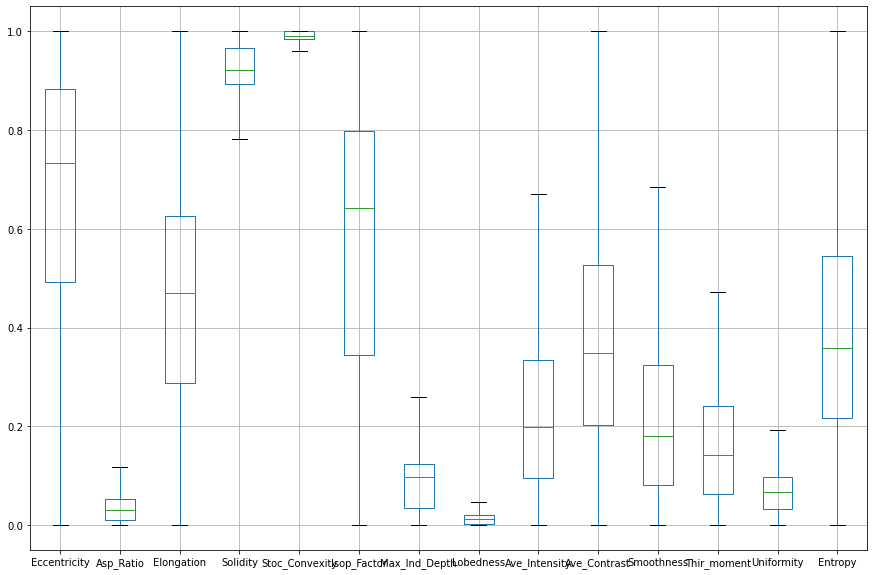

In [79]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.show()

### Storing the clean leaf dataset.

In [80]:
df.to_csv(r'cleanedleaf.csv',index = False) #export clean data into an excel file

# Below is the code for removing features suggested by Greedywise approach in select attribute in weka.

In [81]:
# Reading the clean dataset
df 

,Eccentricity,Asp_Ratio,Elongation,Solidity,Stoc_Convexity,Isop_Factor,Max_Ind_Depth,Lobedness,Ave_Intensity,Ave_Contrast,Smoothness,Thir_moment,Uniformity,Entropy,Class(Species)
0,0.691741,0.025933,0.257336,0.983222,1.000000,0.971479,0.009279,0.000345,0.230372,0.382122,0.208308,0.169265,0.091450,0.396282,SP_1
1,0.708517,0.028789,0.301583,0.975688,0.997100,0.923710,0.012266,0.000491,0.103088,0.230647,0.097316,0.083859,0.023190,0.207629,SP_1
2,0.737430,0.031384,0.335863,0.967879,1.000000,0.935828,0.023558,0.001202,0.037033,0.097132,0.030203,0.023388,0.010571,0.107944,SP_1
3,0.704252,0.025128,0.292781,0.964161,1.000000,0.947178,0.020599,0.000991,0.058865,0.129655,0.043841,0.031295,0.020263,0.164802,SP_1
4,0.800710,0.042376,0.400854,0.966758,1.000000,0.867617,0.023409,0.001191,0.015707,0.048198,0.013006,0.011180,0.005661,0.068032,SP_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.292799,0.007492,0.844076,0.891961,0.983627,0.060086,0.104485,0.020526,0.591755,0.708159,0.563924,0.443711,0.072500,0.732031,SP_36
336,0.185520,0.004342,0.767880,0.891961,0.983627,0.075000,0.104485,0.020526,0.238134,0.747327,0.616513,0.398307,0.096992,0.880824,SP_36
337,0.268094,0.001459,0.801518,0.891961,0.983627,0.072653,0.104485,0.020526,0.499015,0.701772,0.555560,0.163777,0.152262,0.600252,SP_36
338,0.547622,0.007548,0.722836,0.891961,0.983627,0.101431,0.124751,0.020526,0.244371,0.414054,0.236277,0.201667,0.087957,0.387224,SP_36


In [82]:
# Removing irrelevant variables.
df2 = df.drop(columns= ["Stoc_Convexity", "Lobedness", "Ave_Intensity", "Smoothness", "Smoothness", "Thir_moment", "Uniformity"]) # dropping irrelevant variables
df2

,Eccentricity,Asp_Ratio,Elongation,Solidity,Isop_Factor,Max_Ind_Depth,Ave_Contrast,Entropy,Class(Species)
0,0.691741,0.025933,0.257336,0.983222,0.971479,0.009279,0.382122,0.396282,SP_1
1,0.708517,0.028789,0.301583,0.975688,0.923710,0.012266,0.230647,0.207629,SP_1
2,0.737430,0.031384,0.335863,0.967879,0.935828,0.023558,0.097132,0.107944,SP_1
3,0.704252,0.025128,0.292781,0.964161,0.947178,0.020599,0.129655,0.164802,SP_1
4,0.800710,0.042376,0.400854,0.966758,0.867617,0.023409,0.048198,0.068032,SP_1
...,...,...,...,...,...,...,...,...,...
335,0.292799,0.007492,0.844076,0.891961,0.060086,0.104485,0.708159,0.732031,SP_36
336,0.185520,0.004342,0.767880,0.891961,0.075000,0.104485,0.747327,0.880824,SP_36
337,0.268094,0.001459,0.801518,0.891961,0.072653,0.104485,0.701772,0.600252,SP_36
338,0.547622,0.007548,0.722836,0.891961,0.101431,0.124751,0.414054,0.387224,SP_36


### Storing the filtered dataset

In [83]:
df2.to_csv(r'removedFeaturescleanedleaf.csv',index = False) #export clean data into an excel file

### Finding output class ratio.

In [84]:
random.seed(14)
print(y.value_counts()/ len(df))

SP_11    0.047059
SP_9     0.041176
SP_24    0.038235
SP_13    0.038235
SP_10    0.038235
SP_5     0.035294
SP_30    0.035294
SP_28    0.035294
SP_26    0.035294
SP_1     0.035294
SP_29    0.035294
SP_22    0.035294
SP_12    0.035294
SP_14    0.035294
SP_32    0.032353
SP_8     0.032353
SP_35    0.032353
SP_34    0.032353
SP_23    0.032353
SP_31    0.032353
SP_27    0.032353
SP_33    0.032353
SP_3     0.029412
SP_15    0.029412
SP_36    0.029412
SP_2     0.029412
SP_7     0.029412
SP_25    0.026471
SP_4     0.023529
SP_6     0.023529
Name: Class(Species), dtype: float64
